In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the output file #
df = pd.read_csv("hercules_output.csv", index_col=False)
df.head()

,dt,hercules_comms.amr_wind.wind_farm_0.num_turbines,hercules_comms.amr_wind.wind_farm_0.rotor_diameter,hercules_comms.amr_wind.wind_farm_0.turbine_powers.000,hercules_comms.amr_wind.wind_farm_0.turbine_powers.001,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001,hercules_comms.amr_wind.wind_farm_0.wind_direction,hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind,hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.000,...,py_sims.solar_farm_0.initial_conditions.power,py_sims.solar_farm_0.initial_conditions.irradiance,py_sims.solar_farm_0.outputs.power,py_sims.solar_farm_0.outputs.dc_power,py_sims.solar_farm_0.outputs.irradiance,py_sims.solar_farm_0.outputs.aoi,py_sims.inputs.available_power,py_sims.inputs.sim_time_s,time,clock_time
0,0.5,2,126.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,25,1000,28.370887,29.332813,68.230377,41.479017,0.000000,0.0,0.5,2024-02-26 11:32:25.280500
1,0.5,2,126.0,547.772710,400.982884,247.577256,234.622865,240.0,0.5,240.0,...,25,1000,28.394433,29.357123,68.287252,41.479017,948.755595,0.5,1.0,2024-02-26 11:32:25.415733
2,0.5,2,126.0,554.900985,406.941402,243.342712,240.597071,240.0,1.0,240.0,...,25,1000,28.417981,29.381433,68.344128,41.479017,961.842387,1.0,1.5,2024-02-26 11:32:25.537833
3,0.5,2,126.0,537.059442,417.916568,244.450592,241.101026,240.0,1.5,240.0,...,25,1000,28.441529,29.405742,68.401003,41.479017,954.976010,1.5,2.0,2024-02-26 11:32:25.672530
4,0.5,2,126.0,531.784277,407.094202,244.078948,241.342513,240.0,2.0,240.0,...,25,1000,28.465076,29.430051,68.457878,41.479017,938.878479,2.0,2.5,2024-02-26 11:32:25.805623


In [3]:
df.columns

Index(['dt', 'hercules_comms.amr_wind.wind_farm_0.num_turbines',
       'hercules_comms.amr_wind.wind_farm_0.rotor_diameter',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001',
       'hercules_comms.amr_wind.wind_farm_0.wind_direction',
       'hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.001',
       'hercules_comms.helics.config.use_dash_frontend',
       'hercules_comms.helics.config.KAFKA',
       'hercules_comms.helics.config.helics.helicsport',
       'hercules_comms.helics.config.helics.deltat',
       'hercules_comms.helics.config.publication_interval',
       'hercules_comms.helics.config.endpoint_interval',
  

Text(0.5, 0, 'time [hr]')

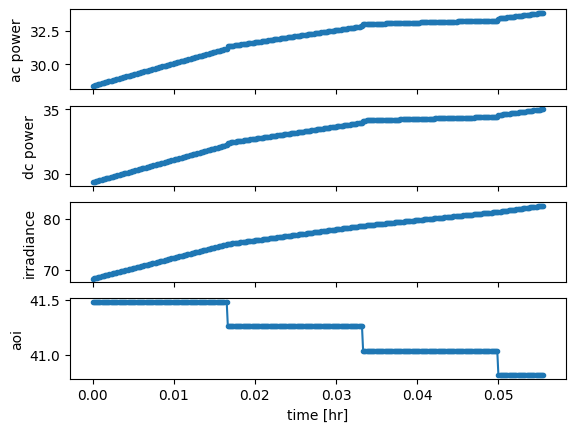

In [4]:
# first test solar module outputs
time = df["hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind"]

ac_power = df["py_sims.solar_farm_0.outputs.power"]
dc_power = df["py_sims.solar_farm_0.outputs.dc_power"]
aoi = df["py_sims.solar_farm_0.outputs.aoi"]
irradiance = df["py_sims.solar_farm_0.outputs.irradiance"]

fig, ax = plt.subplots(4, 1, sharex="col")  # , figsize=[6,5], dpi=250)

ax[0].plot(time / 3600, ac_power, ".-", label="power")
ax[0].set_ylabel("ac power")
# ax[0].legend()

ax[1].plot(time / 3600, dc_power, ".-", label="dc power")
ax[1].set_ylabel("dc power")

ax[2].plot(time / 3600, irradiance, ".-", label="irradiance")
ax[2].set_ylabel("irradiance")
# ax[1].legend()

ax[3].plot(time / 3600, aoi, ".-", label="aoi")
ax[3].set_ylabel("aoi")
ax[-1].set_xlabel("time [hr]")

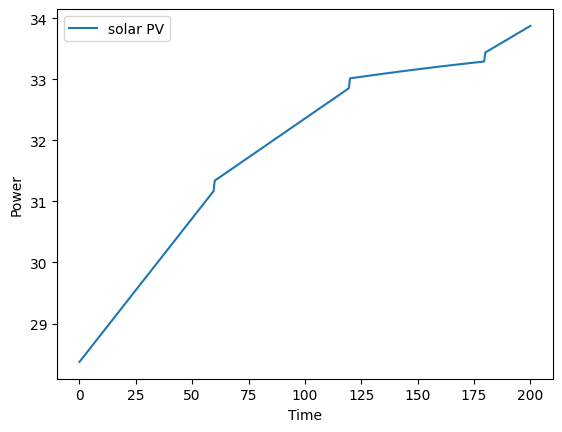

In [5]:
plt.figure()
time = df["hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind"]
plt.plot(time, df["py_sims.solar_farm_0.outputs.power"], label="solar PV")
plt.ylabel("Power")
plt.xlabel("Time")
plt.legend()

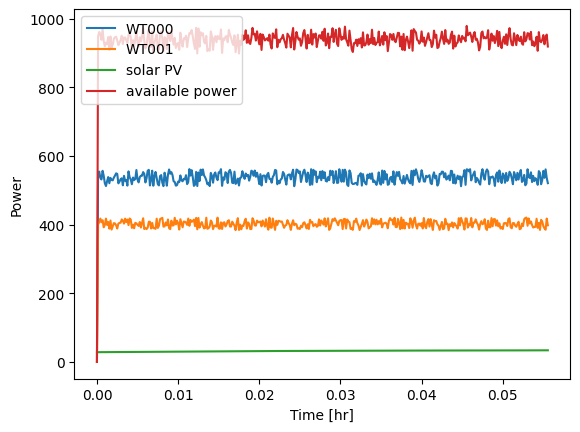

In [6]:
plt.figure()
plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.000"], label="WT000")
plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.001"], label="WT001")
plt.plot(time / 3600, df["py_sims.solar_farm_0.outputs.power"], label="solar PV")
plt.plot(time / 3600, df["py_sims.inputs.available_power"], label="available power")
plt.ylabel("Power")
plt.xlabel("Time [hr]")
plt.legend()